# Assignment 2a
## Exploratory Data Analysis, Data Cleaning, Feature Engineering, PCA, Hyperparameter Optimization, and Multilayer Perceptron Feed-forward Neural Networks
### BIDA 407 | 202305 D01
### Rico Flores

### Instructions

The task involves employing the "Expert" file and a two-layer ANN (Artificial Neural Network) regressor with hidden layers consisting of 200 and 100 neurons, respectively. The model, along with a comprehensive explanation of its hyperparameters, can be accessed at 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


Data cleaning is an essential preliminary step, and your input should be the features **'Ha', 'OII_1', 'OIII', 'NII', 'SII_2'**, with **'tar1'** as the target.

For handling outliers, employ a **96th percentile strategy** and **ensure to eliminate zero values from your input data**.

Before diving into model training, thoroughly understanding all the parameters is crucial (do research). The notebook should contain the following:

1. Identifying the most significant parameters, arranging them in order of importance, and providing justification for your ranking. Also, delineate those parameters that hold lesser importance.


2. Substantiate your claims by training the model with examples using the ranked parameters.

Dataset:
https://drive.google.com/file/d/1wXZpcY7Mw9QEdOPGYjPIG3zoK85W5Mpj/view?usp=share_link


## Part 1 - Understanding the Data and Data Cleaning

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### A. Loading and getting an understanding of our data:

In [ ]:
# Loading the data
df_expert = pd.read_csv('Expert.csv')

In [ ]:
# Checking the size of the dataset
df_expert.shape

(158888, 33)

In [ ]:
# Checking the first few rows
df_expert.head()

,tar1,tar2,tar3,tar4,tar5,tar6,tar7,tar8,tar9,tar10,...,SII_1,SII_2,err_Ha,err_Hb,err_OII_1,err_OII_2,err_OIII,err_NII,err_SII_1,err_SII_2
0,NaN,8.92791,8.54151,8.66548,8.66583,NaN,NaN,8.49927,8.44851,NaN,...,32.7227,30.5258,1.89123,1.71128,3.235330,3.135900,1.69458,1.37601,1.77140,1.54868
1,NaN,8.79355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.5688,10.0110,1.65269,1.90977,-0.731523,-0.731523,1.80062,1.37111,1.39628,1.33581
2,NaN,9.06602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.5210,85.9468,4.16357,2.86528,5.253650,5.054050,2.50198,2.80719,2.37185,2.21079
3,8.86975,8.88465,8.51746,8.64180,8.67329,8.96472,8.97729,8.48092,8.45596,8.81754,...,103.5020,73.0610,3.21591,2.55166,4.744070,4.651920,2.26811,1.82378,1.96347,1.71892
4,NaN,8.85254,NaN,8.73630,8.64105,NaN,NaN,8.54667,8.42411,NaN,...,67.0255,34.8271,4.67031,4.00723,7.634400,7.741910,4.43649,3.59679,4.95500,4.27283


### B. Dropping tar2 up to tar12 as we only need tar1 as target:

In [ ]:
# Creating an array of columns to be dropped
col_drop = []

for i in range(2, 13):
    tar_string = 'tar' + str(i)
    col_drop.append(tar_string)

df_expert = df_expert.drop(col_drop, axis='columns')

In [ ]:
# Checking the new dataset 
df_expert.isnull().sum()

tar1         83036
z                0
mass            36
agn_sn           0
cf_g             0
cf_r             0
Ha               0
Hb               0
OII_1            0
OII_2            0
OIII             0
NII              0
SII_1            0
SII_2            0
err_Ha           0
err_Hb           0
err_OII_1        0
err_OII_2        0
err_OIII         0
err_NII          0
err_SII_1        0
err_SII_2        0
dtype: int64

In [ ]:
df_expert.shape

(158888, 22)

### C. Dropping other columns as it is instructed that we use the folowing as inputs:

1. 'Ha'
2. 'OII_1'
3. 'OIII'
4. 'NII'
5. 'SII_2'

In [ ]:
columns_to_drop = ['z', 'mass', 'agn_sn', 'cf_g', 'cf_r', 'Hb', 'OII_2',
                   'SII_1', 'err_Ha', 'err_Hb', 'err_OII_1', 'err_OII_2',
                   'err_OIII', 'err_NII', 'err_SII_1', 'err_SII_2']

df_expert = df_expert.drop(columns=columns_to_drop)

In [ ]:
# Checking the new dataset 
df_expert.head()

,tar1,Ha,OII_1,OIII,NII,SII_2
0,NaN,173.5340,84.3486,33.7560,51.5031,30.5258
1,NaN,45.7435,0.0000,10.2213,17.2484,10.0110
2,NaN,766.7570,288.0100,60.3379,259.7680,85.9468
3,8.86975,514.5250,268.7020,84.2799,139.3550,73.0610
4,NaN,286.5530,132.1000,91.7679,107.7070,34.8271


In [ ]:
# Checking the new shape of the dataset after the changes
df_expert.shape

(158888, 6)

In [ ]:
# Checking for nulls in the dataset
df_expert.isnull().sum()

tar1     83036
Ha           0
OII_1        0
OIII         0
NII          0
SII_2        0
dtype: int64

### D. Dropping the NaNs

As we do not have much info about the data, it is better to drop the NaNs instead of imputing them with statistically generated values.

In [ ]:
df_expert = df_expert.dropna()

In [ ]:
# Confirming that we have dropped the NaNs
df_expert.isnull().sum()

tar1     0
Ha       0
OII_1    0
OIII     0
NII      0
SII_2    0
dtype: int64

In [ ]:
# Checking the new shape of the dataset
df_expert.shape

(75852, 6)

### E. Removing zeros from the input columns

In [ ]:
# Checking the number of rows with zeros in the input column

cols = ['Ha', 'OII_1', 'OIII', 'NII', 'SII_2']
num_rows = (df_expert[cols] == 0).any(axis=1).sum()

print("Number of rows with zeros in specified columns:", num_rows)

Number of rows with zeros in specified columns: 553


Python any() function returns True if any of the elements of a given iterable are True else it returns False.

In [ ]:
# Checking input columns for zeros and then creating a boolean mask for any that has
cols = ['Ha', 'OII_1', 'OIII', 'NII', 'SII_2']
mask = (df_expert[cols] == 0).any(axis=1)

df_expert = df_expert.drop(df_expert[mask].index)

In [ ]:
# Checking the number of rows with zeros in the input column

cols = ['Ha', 'OII_1', 'OIII', 'NII', 'SII_2']
num_rows = (df_expert[cols] == 0).any(axis=1).sum()

print("Number of rows with zeros in specified columns:", num_rows)

Number of rows with zeros in specified columns: 0


## Part 2 - EDA and Feature Engineering

Now, that we have our final DataFrame, we can now do some statistical analysis to better understand the data that we will be working with.

### A. Univariate Analysis

In [ ]:
df_expert.head()

,tar1,Ha,OII_1,OIII,NII,SII_2
3,8.86975,514.525,268.702,84.2799,139.355,73.0610
5,9.10778,1011.950,494.637,127.8520,470.790,124.1400
6,9.11417,284.017,120.660,55.6030,119.600,47.5061
8,9.08641,542.953,112.974,40.1321,213.997,69.0888
11,8.86924,1176.250,520.896,351.3100,299.127,158.9760


In [ ]:
df_expert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75299 entries, 3 to 158887
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tar1    75299 non-null  float64
 1   Ha      75299 non-null  float64
 2   OII_1   75299 non-null  float64
 3   OIII    75299 non-null  float64
 4   NII     75299 non-null  float64
 5   SII_2   75299 non-null  float64
dtypes: float64(6)
memory usage: 4.0 MB


The final DataFrame has 75299 rows and 6 columns, with all columns containing floating-point numeric values. There are no missing values (non-null count is the same as the total number of entries) which is good.

In [ ]:
df_expert.describe()

,tar1,Ha,OII_1,OIII,NII,SII_2
count,75299.000000,75299.000000,75299.000000,75299.000000,75299.000000,75299.000000
mean,8.874866,994.535112,448.989244,255.309581,313.503654,121.013498
std,0.169880,1353.023753,1346.114670,562.021882,472.788525,135.149922
min,8.107170,39.864900,8.379180,8.882720,8.460380,6.657270
25%,8.778465,357.280500,166.571500,73.685650,83.479000,50.454100
50%,8.900820,647.223000,282.633000,126.917000,178.511000,84.549400
75%,8.996545,1179.355000,505.346500,244.736000,364.520000,143.282500
max,9.292740,172126.000000,322648.000000,76271.900000,16698.200000,7295.180000


Observing the descriptive statistics of our dataframe, we can assume that most of the data in our inpput variables live outside the 75th percentile, as the 75th precentile is still so small compared to the total sample count. Visualizing these percentiles will help us understand the data further and probably show the existence of outliers.

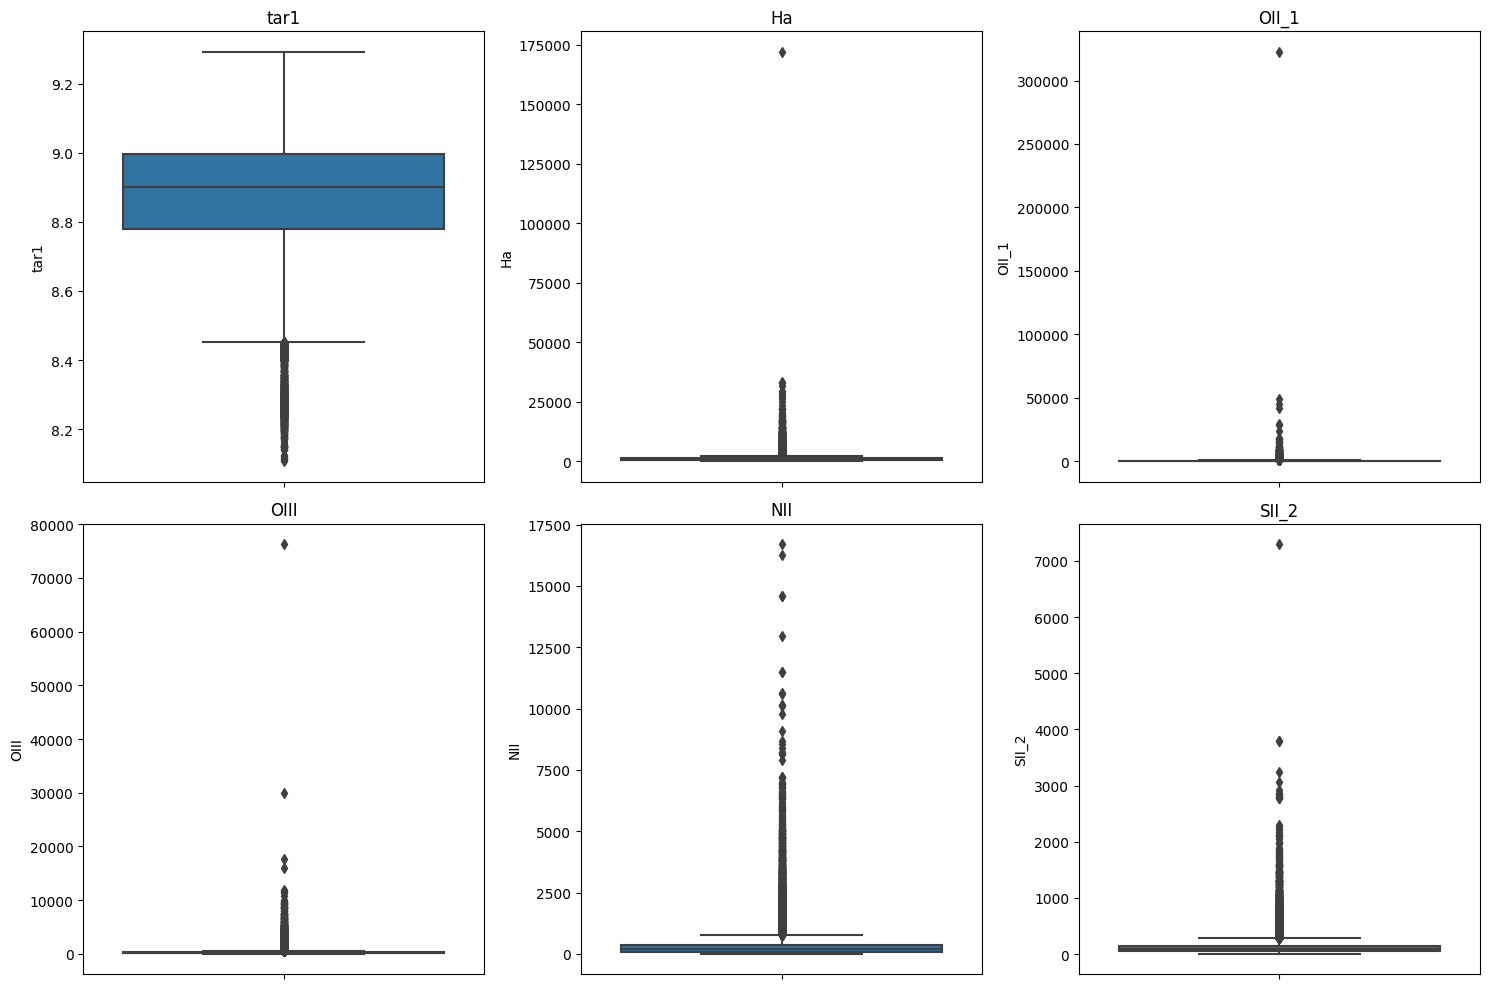

In [ ]:
# Set the number of columns and rows for subplots
num_cols = 3  # Number of columns for subplots
num_rows = 2  # Number of rows for subplots
total_plots = num_cols * num_rows

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame and create a boxplot
for i, column in enumerate(df_expert.columns):
    # Select the current axis for plotting
    ax = axes[i]
    
    # Create a boxplot for the current column
    sns.boxplot(data=df_expert, y=column, ax=ax)
    
    # Set the title for the current subplot
    ax.set_title(column)

# Remove any unused subplots
if len(df_expert.columns) < total_plots:
    for j in range(len(df_expert.columns), total_plots):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the multiplot boxplot
plt.show()

**We can see that there is a lot of outliers in our data** as seen in the data points that is outside the upper and lower whiskers in the boxplot. The whiskers are  set to 1.5 of the interquartile range by default .

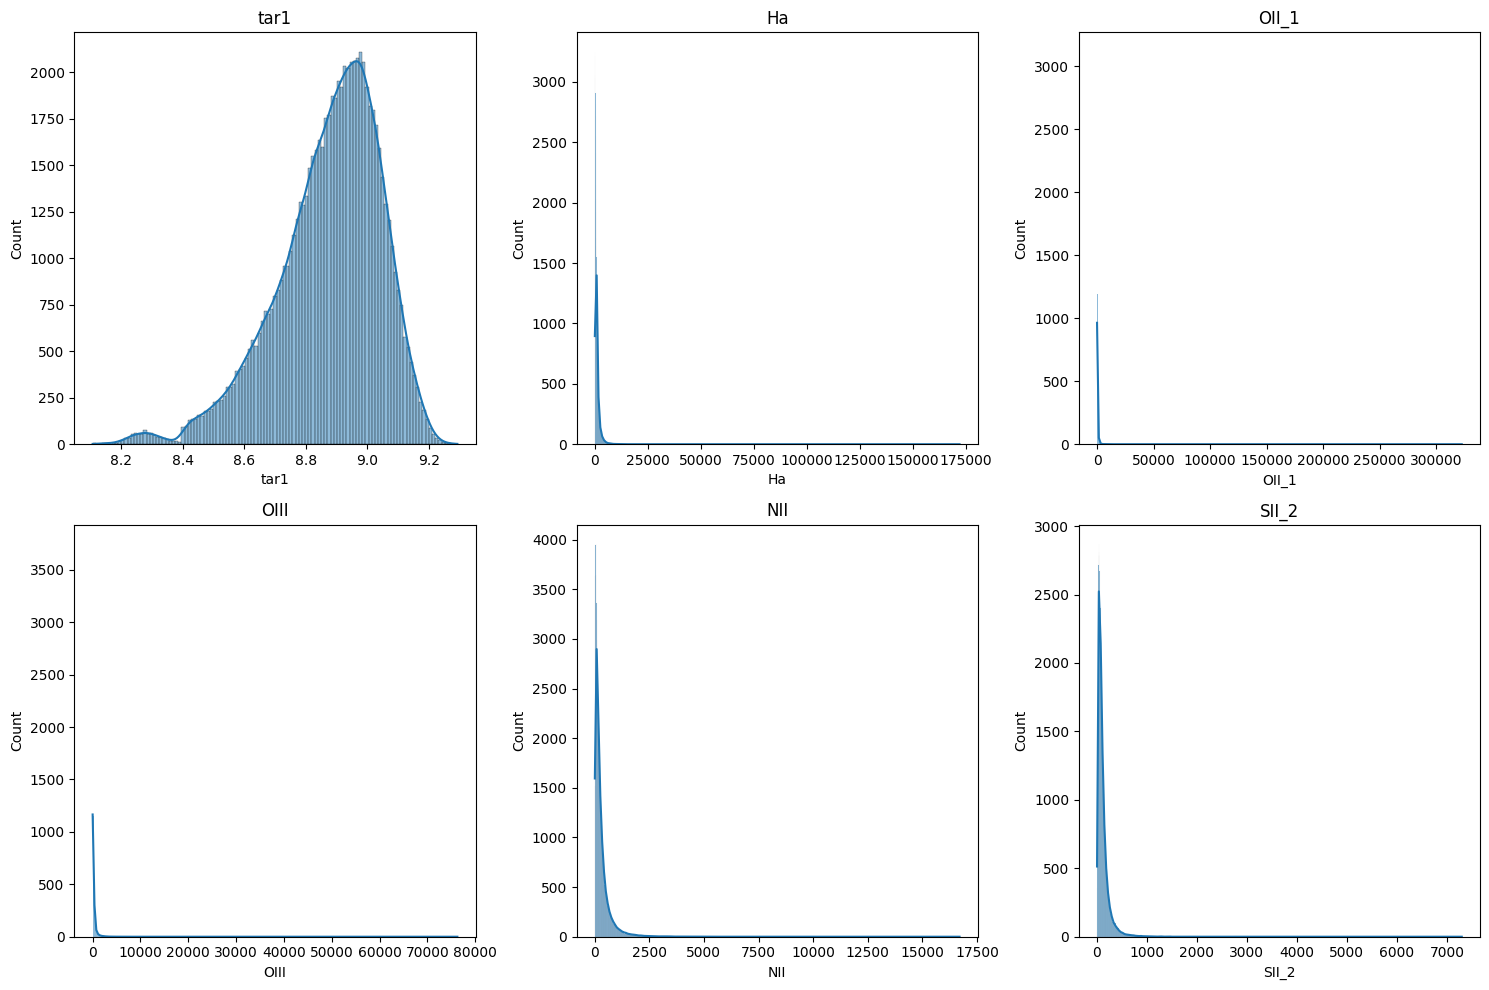

In [ ]:
# Set the number of columns and rows for subplots
num_cols = 3  # Number of columns for subplots
num_rows = 2  # Number of rows for subplots
total_plots = num_cols * num_rows

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame and create a histplot
for i, column in enumerate(df_expert.columns):
    # Select the current axis for plotting
    ax = axes[i]
    
    # Create a histplot for the current column
    sns.histplot(data=df_expert, x=column, kde=True, ax=ax)
    
    # Set the title for the current subplot
    ax.set_title(column)

# Remove any unused subplots
if len(df_expert.columns) < total_plots:
    for j in range(len(df_expert.columns), total_plots):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the multiplot histplot
plt.show()

From these charts we can observe that our target variables are heavily tailed and skewed. Let's verify this by checking the data's kurtosis.

In [ ]:
df_expert.kurtosis()

tar1         0.901058
Ha        3444.298598
OII_1    43651.567696
OIII      4615.958527
NII        129.076190
SII_2      174.401777
dtype: float64



```
# This is formatted as code
```

### B. Substituting extreme outliers with the 96th Percentile.

1. Calculate the 96th percentile of a specific variable in your dataset. This can be done using statistical functions or libraries in programming languages such as Python (e.g., NumPy, Pandas).

2. Determine a threshold value based on the 96th percentile. This threshold indicates the maximum value beyond which the data points are considered outliers.

3. Identify data points in the variable that exceed the threshold value. These points are potential outliers.

4. Decide on an appropriate action to handle the identified outliers. Some common approaches include:


Calculating the 96th percentile value in the dataset. The 96th percentile represents a threshold above which data points are considered outliers. (McKinney, 2012)

In [ ]:
# Defining the input columns
cols = ['Ha', 'OII_1', 'OIII', 'NII', 'SII_2']

# Creating a for loop that will run the process through every input column
for col in cols:
    data = df_expert[col]
    
    # Defining the 96th percentile in a given column 
    # using the numpy function percentile
    percentile_96 = np.percentile(data, 96)

    # Creating a boolean mask that will return a TRUE value
    # if a row value is greater than the 96th percentile
    outliers_mask = data > percentile_96
    
    # Replacing outliers with the 96th percentile value
    df_expert.loc[outliers_mask, col] = percentile_96


Displaying the same histograms after handling the outliers.

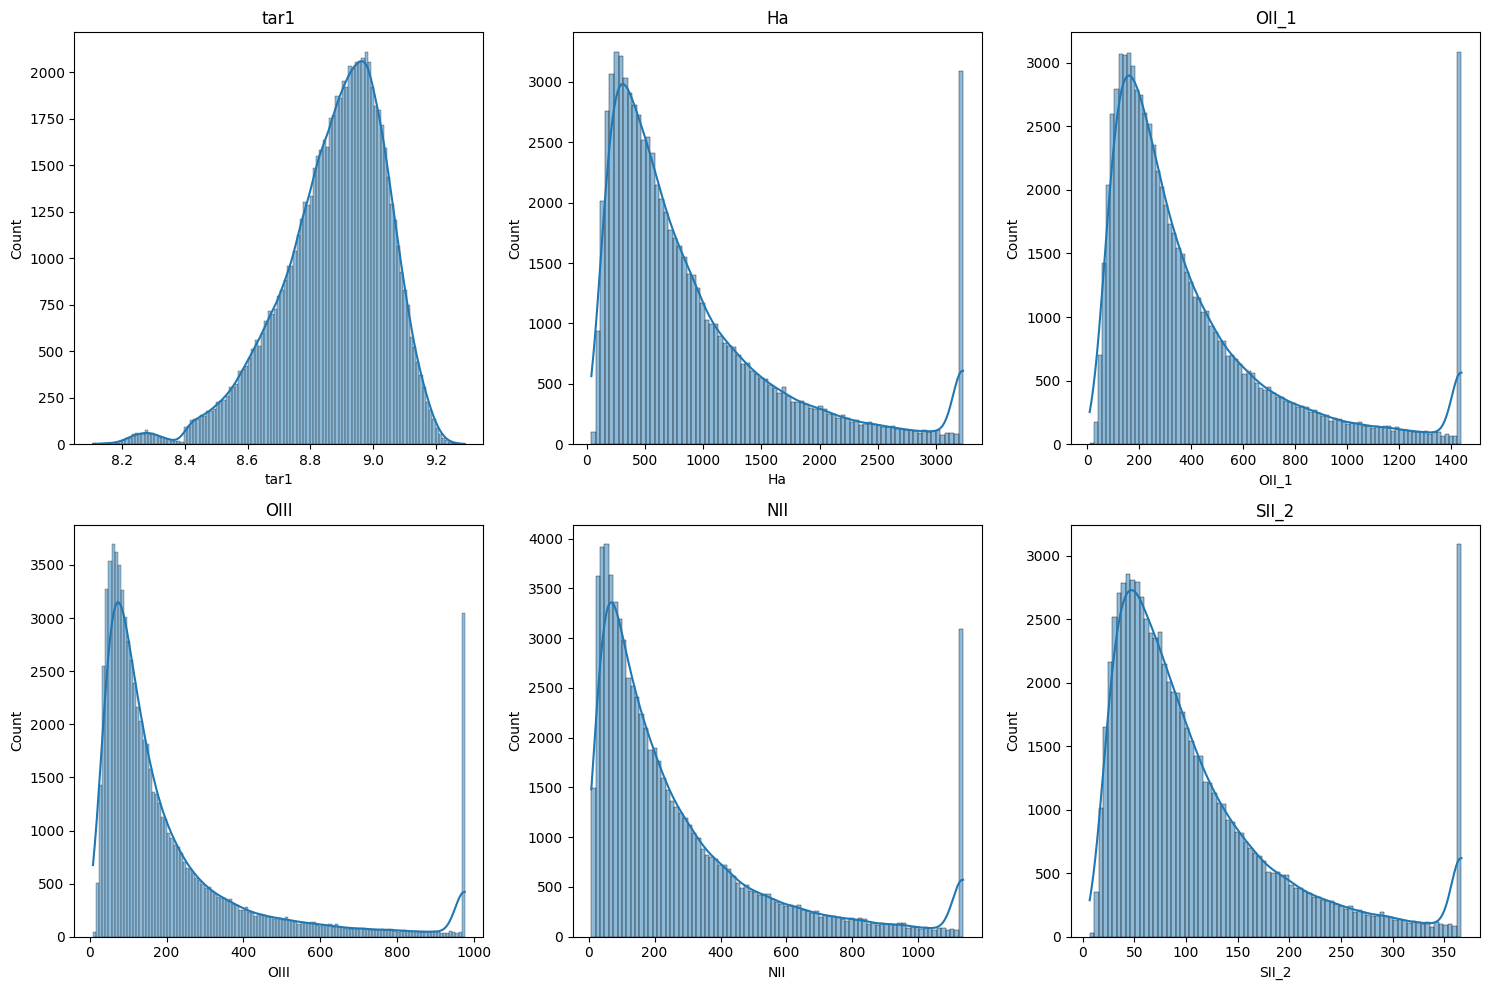

In [ ]:
# Set the number of columns and rows for subplots
num_cols = 3  # Number of columns for subplots
num_rows = 2  # Number of rows for subplots
total_plots = num_cols * num_rows

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame and create a histplot
for i, column in enumerate(df_expert.columns):
    # Select the current axis for plotting
    ax = axes[i]
    
    # Create a histplot for the current column
    sns.histplot(data=df_expert, x=column, kde=True, ax=ax)
    
    # Set the title for the current subplot
    ax.set_title(column)

# Remove any unused subplots
if len(df_expert.columns) < total_plots:
    for j in range(len(df_expert.columns), total_plots):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the multiplot histplot
plt.show()


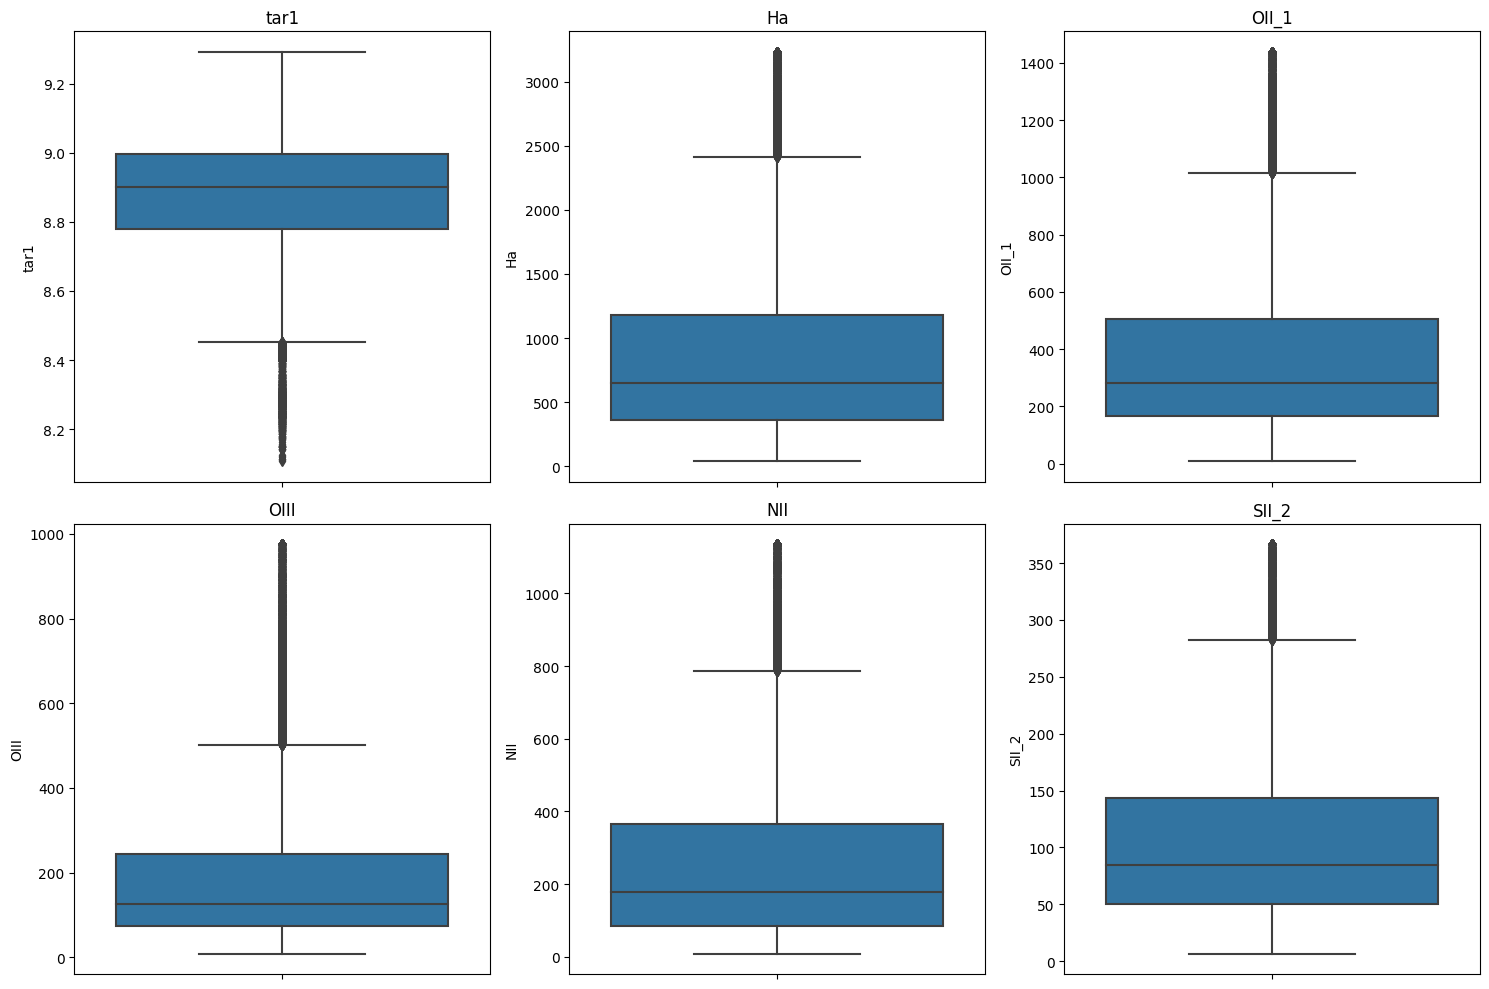

In [ ]:
# Set the number of columns and rows for subplots
num_cols = 3  # Number of columns for subplots
num_rows = 2  # Number of rows for subplots
total_plots = num_cols * num_rows

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame and create a boxplot
for i, column in enumerate(df_expert.columns):
    # Select the current axis for plotting
    ax = axes[i]
    
    # Create a boxplot for the current column
    sns.boxplot(data=df_expert, y=column, ax=ax)
    
    # Set the title for the current subplot
    ax.set_title(column)

# Remove any unused subplots
if len(df_expert.columns) < total_plots:
    for j in range(len(df_expert.columns), total_plots):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Display the multiplot boxplot
plt.show()


## Part 3 - Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Checking the shape of the dataset so far
df_expert.shape

(75299, 6)

#### A. Separating the input and target variables

In [ ]:
X = df_expert[['Ha', 'OII_1', 'OIII', 'NII', 'SII_2']]
y = df_expert['tar1']

#### B. Normalizing the input variables

In [ ]:
mmscaler = MinMaxScaler()
X_scaled = mmscaler.fit_transform(X)

#### C. Applying PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#### D. Analyzing the Cumulative Explained Variances

In [ ]:
explained_variances = pca.explained_variance_ratio_

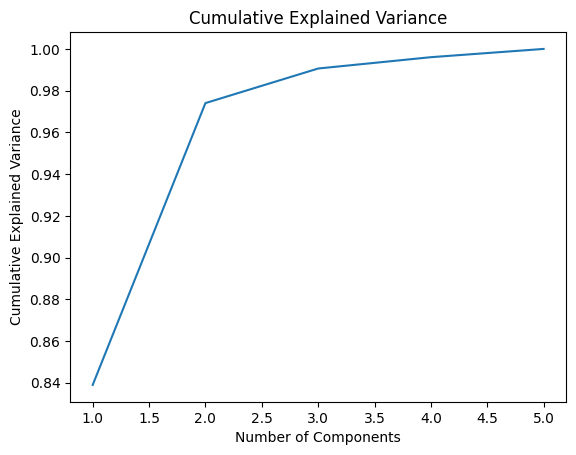

In [ ]:
cumulative_variance = np.cumsum(explained_variances)

# Create a line plot using Seaborn
sns.lineplot(x=range(1, len(explained_variances) + 1), y=cumulative_variance)

plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.show()

#### E. Checking the Scree Plot

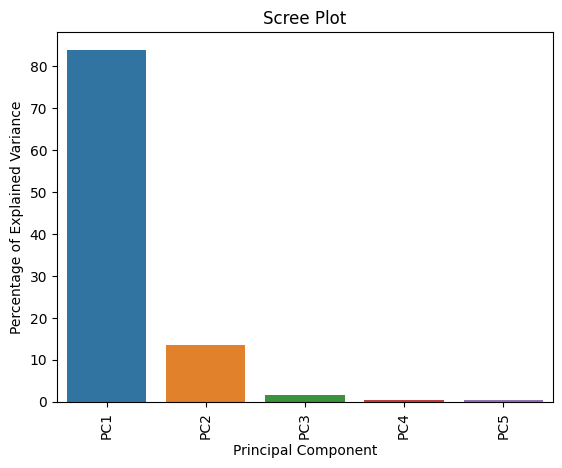

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

# Create a bar plot using Seaborn
sns.barplot(x=labels, y=per_var)

# Set labels and title
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

#### F. Transforming the data using 2 optimal components

In [ ]:
# Choosing 2 to be the number of PCs
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

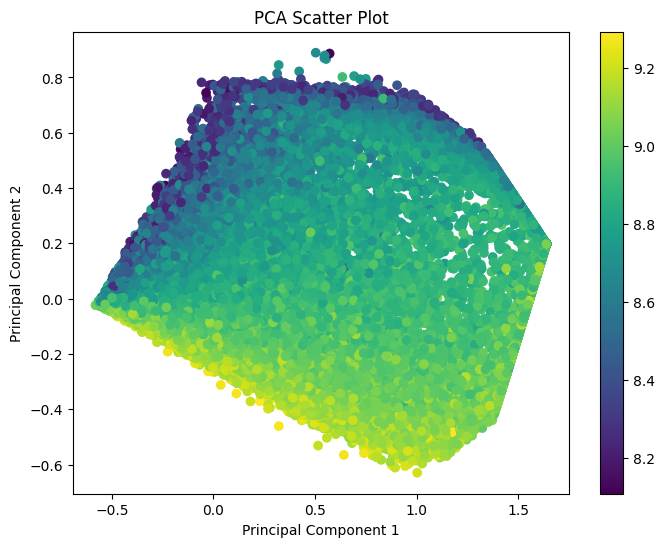

In [ ]:
PC1 = X_pca[:, 0]
PC2 = X_pca[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(PC1, PC2, c=y, cmap='viridis') # y = target variable
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.colorbar()
plt.show()

## Part 4 - Machine Learning / Data Modeling

#### A. Modeling without parameter optimization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**1. Splitting the training and test data**

In [ ]:
# Splitting the data, 20% test size
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

**2a. Defining the model parameters and training the model, printing the loss function every 50th iteration until 2000th iteration.**

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(200, 100), random_state=42)
model.fit(X_train, y_train)

# Get the loss values per training iteration
loss_values = np.repeat(model.loss_curve_, model.max_iter)

# Print the loss every 50th iteration up to the 2000th iteration
for i, loss in enumerate(loss_values):
    if (i + 1) % 50 == 0 and (i + 1) <= 2000:
        print(f"Iteration: {i+1}, Loss: {loss}")

Iteration: 50, Loss: 3.438927202852847
Iteration: 100, Loss: 3.438927202852847
Iteration: 150, Loss: 3.438927202852847
Iteration: 200, Loss: 3.438927202852847
Iteration: 250, Loss: 0.0063719150028392095
Iteration: 300, Loss: 0.0063719150028392095
Iteration: 350, Loss: 0.0063719150028392095
Iteration: 400, Loss: 0.0063719150028392095
Iteration: 450, Loss: 0.0030812605043756373
Iteration: 500, Loss: 0.0030812605043756373
Iteration: 550, Loss: 0.0030812605043756373
Iteration: 600, Loss: 0.0030812605043756373
Iteration: 650, Loss: 0.002662638223367256
Iteration: 700, Loss: 0.002662638223367256
Iteration: 750, Loss: 0.002662638223367256
Iteration: 800, Loss: 0.002662638223367256
Iteration: 850, Loss: 0.0024971920728310767
Iteration: 900, Loss: 0.0024971920728310767
Iteration: 950, Loss: 0.0024971920728310767
Iteration: 1000, Loss: 0.0024971920728310767
Iteration: 1050, Loss: 0.002416820459773623
Iteration: 1100, Loss: 0.002416820459773623
Iteration: 1150, Loss: 0.002416820459773623
Iteratio

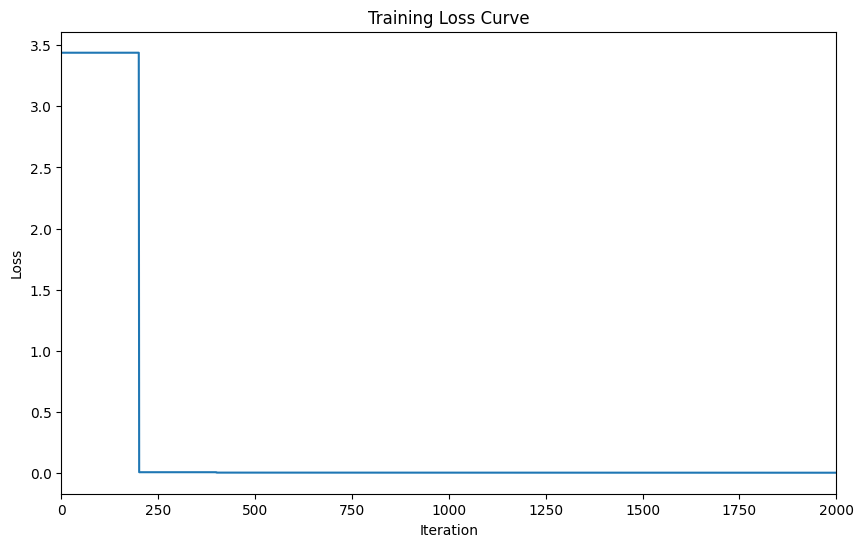

In [ ]:
# Get the loss values per training iteration
loss_values = np.repeat(model.loss_curve_, model.max_iter)

# Plot the loss curve using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, len(loss_values) + 1), y=loss_values)
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.xlim(0, 2000)  # Set x-axis limits
plt.show()

**3a. Testing the model's performance with the training data.**

In [ ]:
y_train_pred = model.predict(X_train)

**4. Testing the model's performance with the test data.**

In [ ]:
y_test_pred = model.predict(X_test)

**5. Visualizing the model's performance**

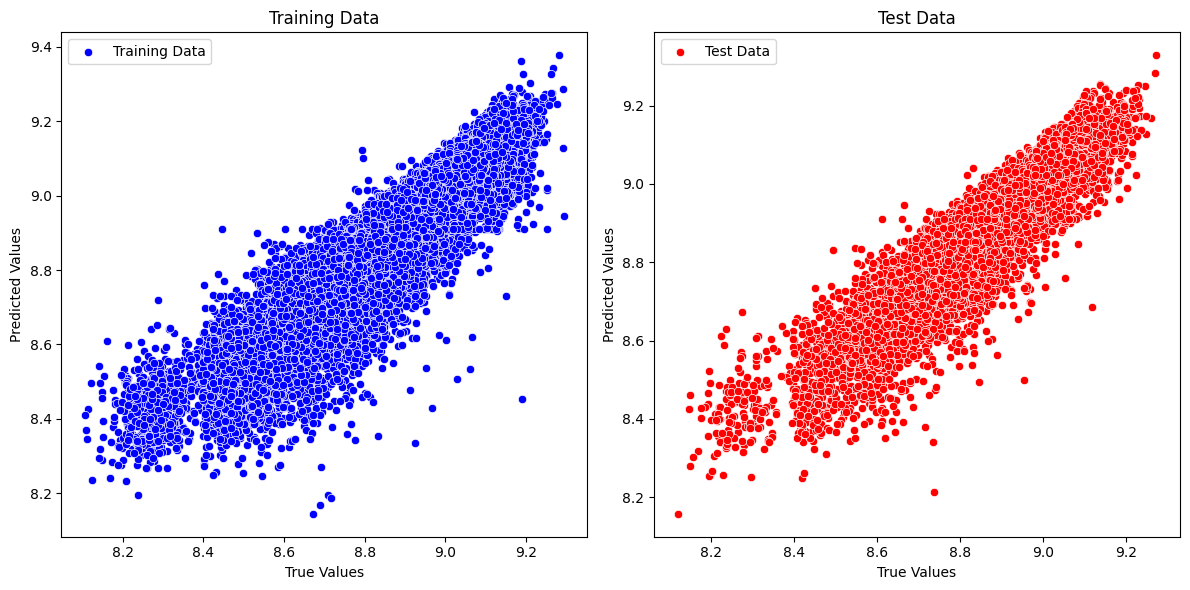

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for training data
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Training Data', ax=ax1)
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Training Data')
ax1.legend()

# Scatter plot for test data
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Test Data', ax=ax2)
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Test Data')
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

We'll Mean Absolute Error as it would less sensitive to outliers.

Mean Absolute Error (MAE):
- Measures the average absolute difference between the predicted and true values.
- Less sensitive to outliers compared to MSE and RMSE.
- Provides a more intuitive understanding of the average error magnitude.

In [ ]:
# Calculate evaluation metrics
y_true = y_test

MAE = mean_absolute_error(y_true, y_test_pred)

# Display the metrics DataFrame
print('Mean Absolute Error: ' + str(MAE))

Mean Absolute Error: 0.056677175252282865


#### B. Modeling with Manual Parameter Optimization

**2b. Defining the model parameters and training the model, printing the loss function every 50th iteration until 2000th iteration.**

Do trial and error and experiment with the values of alpha, learning_rate_init, and max iter.

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(200, 100), random_state=42, alpha=0.001, learning_rate_init=0.01, 
                     activation='relu', solver='adam', max_iter=100)
model.fit(X_train, y_train)

# Get the loss values per training iteration
loss_values = np.repeat(model.loss_curve_, model.max_iter)

# Print the loss every 50th iteration up to the 2000th iteration
for i, loss in enumerate(loss_values):
    if (i + 1) % 50 == 0 and (i + 1) <= 2000:
        print(f"Iteration: {i+1}, Loss: {loss}")

Iteration: 50, Loss: 0.5969107755096754
Iteration: 100, Loss: 0.5969107755096754
Iteration: 150, Loss: 0.0034409323343020416
Iteration: 200, Loss: 0.0034409323343020416
Iteration: 250, Loss: 0.003020663731304604
Iteration: 300, Loss: 0.003020663731304604
Iteration: 350, Loss: 0.0028741894762076324
Iteration: 400, Loss: 0.0028741894762076324
Iteration: 450, Loss: 0.002754805684008449
Iteration: 500, Loss: 0.002754805684008449
Iteration: 550, Loss: 0.002752462019686182
Iteration: 600, Loss: 0.002752462019686182
Iteration: 650, Loss: 0.002771095591283868
Iteration: 700, Loss: 0.002771095591283868
Iteration: 750, Loss: 0.002830338398407569
Iteration: 800, Loss: 0.002830338398407569
Iteration: 850, Loss: 0.0029312646327653005
Iteration: 900, Loss: 0.0029312646327653005
Iteration: 950, Loss: 0.002999095179236755
Iteration: 1000, Loss: 0.002999095179236755
Iteration: 1050, Loss: 0.003211722173724254
Iteration: 1100, Loss: 0.003211722173724254
Iteration: 1150, Loss: 0.0034689920411436915
Itera

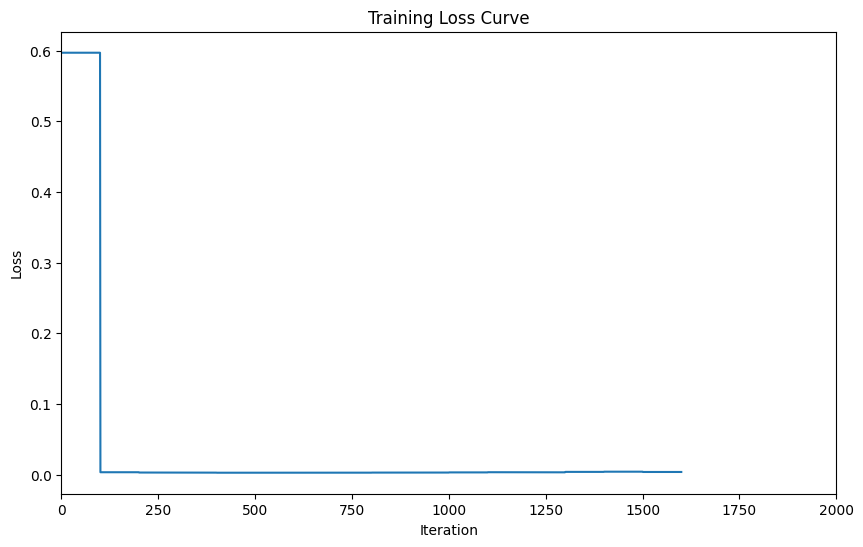

In [ ]:
# Get the loss values per training iteration
loss_values = np.repeat(model.loss_curve_, model.max_iter)

# Plot the loss curve using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(1, len(loss_values) + 1), y=loss_values)
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.xlim(0, 2000)  # Set x-axis limits
plt.show()

**3b. Testing the model's performance with the training data.**

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_test_pred = model.predict(X_test)

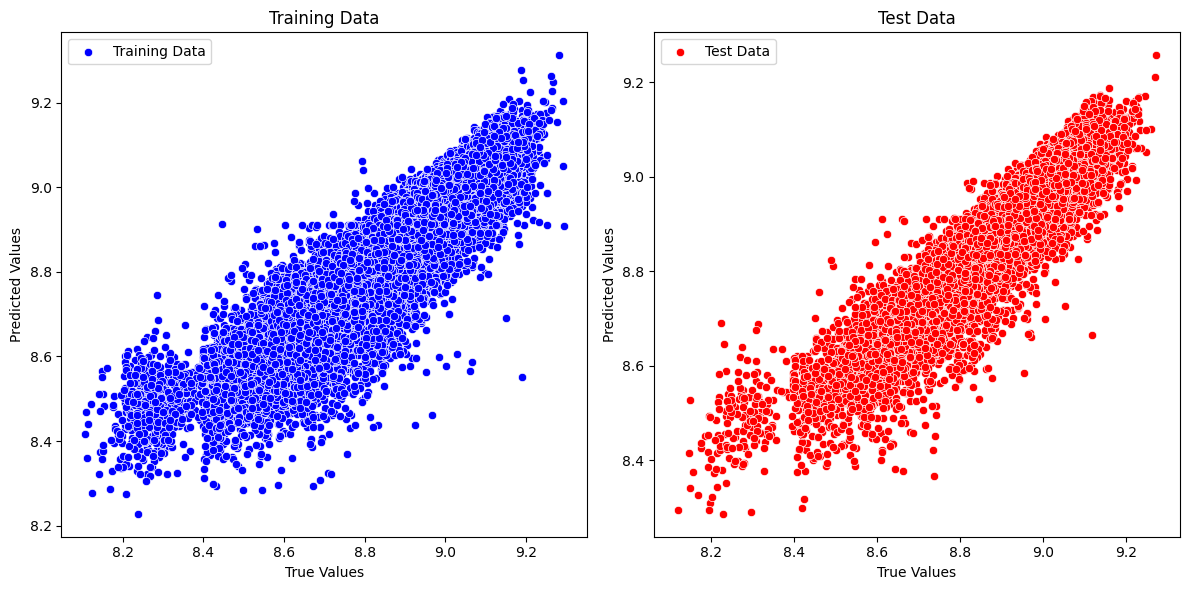

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for training data
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Training Data', ax=ax1)
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Training Data')
ax1.legend()

# Scatter plot for test data
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Test Data', ax=ax2)
ax2.set_xlabel('True Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Test Data')
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Calculate evaluation metrics
y_true = y_test

MAE = mean_absolute_error(y_true, y_test_pred)

# Display the metrics DataFrame
print('Mean Absolute Error: ' + str(MAE))

Mean Absolute Error: 0.049790768201298706


#### C. Observations

Higher values of alpha increase the amount of regularization, reducing the model's complexity.

Higher learning rates can cause larger weight updates, which may be beneficial for faster convergence.
However, a high learning rate combined with a high alpha value can potentially lead to instability or overshooting of the optimal solution, as the weight updates are larger and constrained by the regularization term.

Conversely, a low learning rate combined with a high alpha value can slow down the convergence process.
It is important to experiment and find an appropriate balance between alpha and learning_rate_init for optimal training performance, considering factors such as the dataset size, complexity, and desired model behavior.

The effect of MLPRegressor's parameters on model training can vary depending on the specific dataset and problem at hand. However, here is a rough ranking of the parameters based on their typical impact on the model training process:

1. (`hidden_layer_sizes`): The architecture of the hidden layers, including the number of layers and the number of neurons in each layer, has a significant impact on model training. Designing an appropriate architecture tailored to the problem at hand is crucial for achieving good performance.

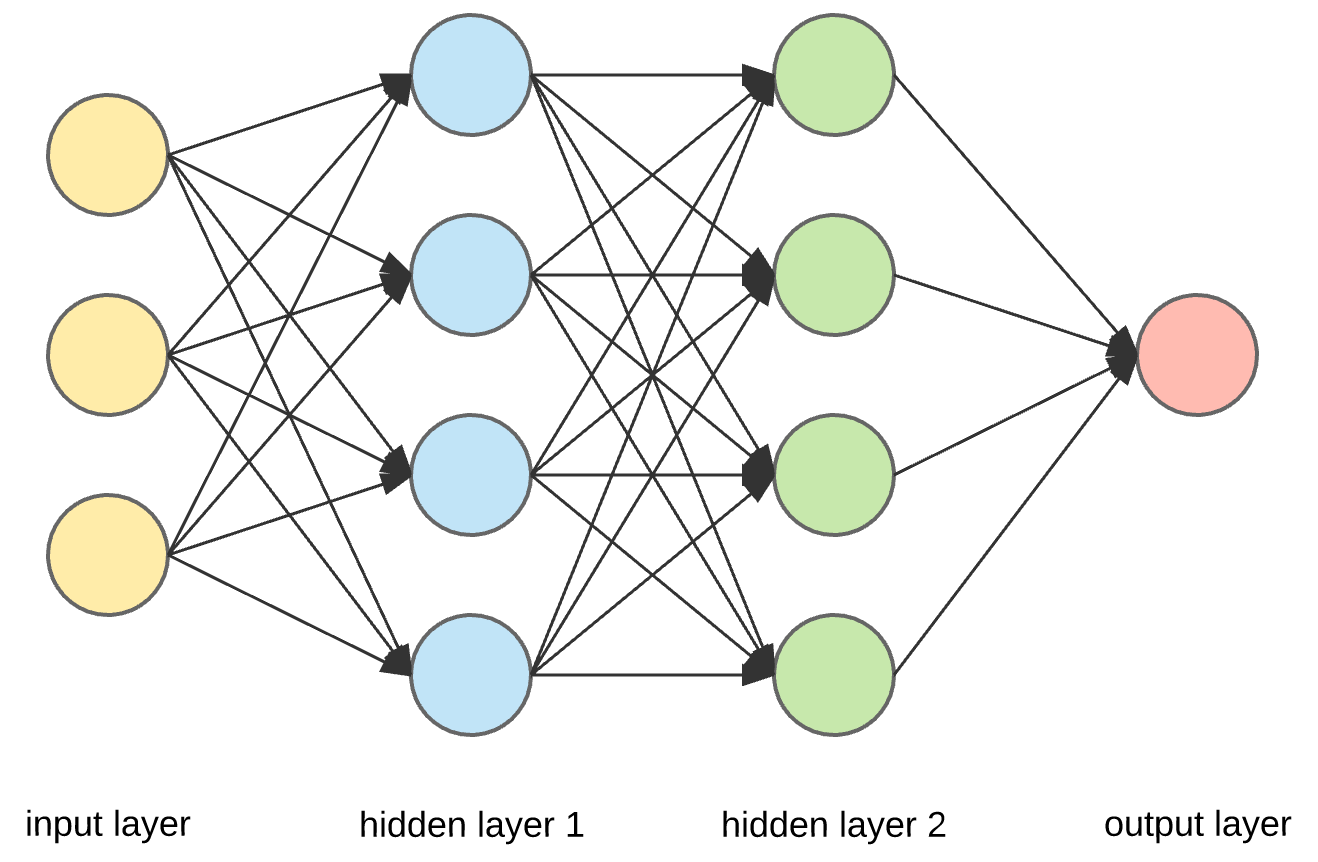

2. (`learning_rate_init`): The learning rate determines the step size used in updating the model's weights during training. It can affect the convergence and stability of the training process. It is responsible for balancing the convergence speed and stability.

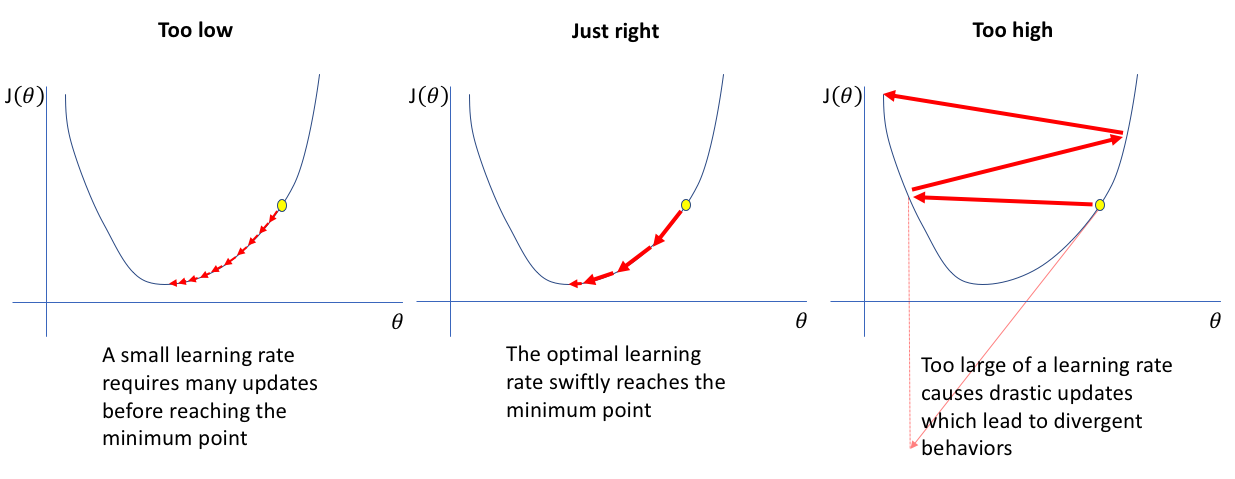

3. (`alpha`): Strength of the L2 regularization term. Regularization in deep learning is a technique used to prevent overfitting and improve the generalization of neural networks. It involves adding a regularization term to the loss function, which penalizes large weights or complex model architectures. Regularization methods such as L1 and L2 regularization, dropout, and batch normalization help control model complexity and improve its ability to generalize to unseen data.


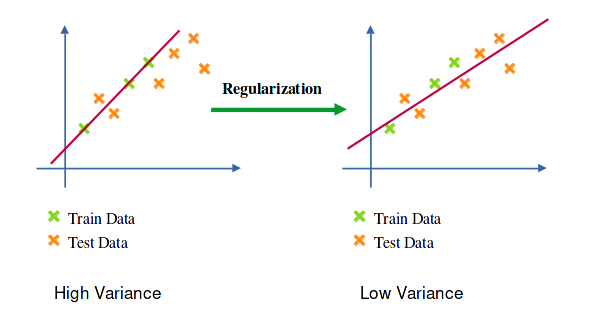


4. (`activation`): The activation function introduces non-linearity to the model and influences the learning behavior of the neural network. The first is a hyperbolic tangent that ranges from -1 to 1, while the other is the logistic function, which is similar in shape but ranges from 0 to 1. In recent developments of deep learning the rectified linear unit (ReLU) is more frequently used as one of the possible ways to overcome the numerical problems related to the sigmoids.

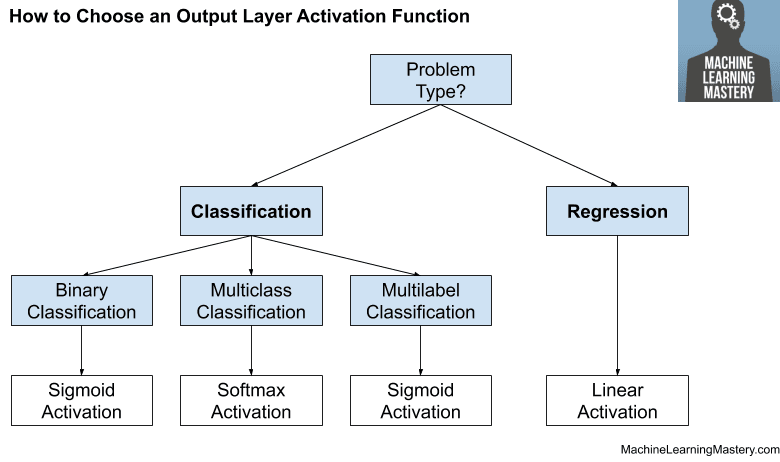

5. (`solver`): The solver determines the optimization algorithm used to train the MLP. Different solvers have different computational characteristics and convergence properties. Choosing an appropriate solver based on the dataset size, complexity, and available computational resources is important for efficient training.

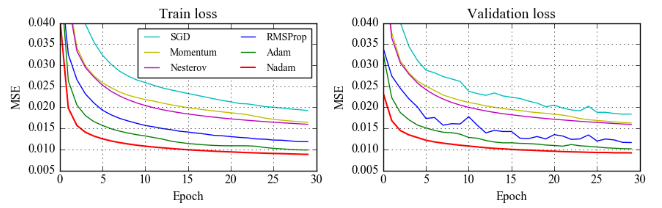

6. (`max_iter`): The maximum number of iterations determines the maximum number of training epochs. It affects the overall training time and can impact the model's convergence. Setting an appropriate value is important to allow the model to converge while avoiding excessive training time.




## Resources



1. Müller, A., & Guido, S. (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists. http://cds.cern.ch/record/2229831
2. McKinney, W. (2012). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. http://cds.cern.ch/record/2288466
3. sklearn.neural_network.MLPRegressor. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
4. Kar, U. (2022, January 6). Concept of Machine Learning | Ridge Regression or L2 Regularization, Lasso Regression or L1 Regularization. Medium. https://medium.com/nerd-for-tech/concept-of-machine-learning-ridge-regression-or-l2-regularization-58a5286e7375
5. Bushaev, V. (2018, October 24). Adam — latest trends in deep learning optimization. Medium. https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c